In [1]:
!pip install --upgrade pandas -q

# 1.5 - Visualisation

## <center> Встроенные элементы визуализации в Pandas</center> 

Для визуализации данных из датасета необязательно использовать сторонние фреймворки,<br>
в Pandas есть несколько встроенных функций, которыми достаточно просто пользоваться.

<center><b> df.hist( )</b></center> 

<code>df.hist( )</code> - строит гистограмму распределения данных по числовым столбцам

In [2]:
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import warnings
warnings.simplefilter('ignore')

age  user_rating  user_rides  user_time_accident     user_id  sex  \
1601    48          8.1         152                51.0  T14263927L    0   
13915   36          7.9          27                 9.0  l12006436j    0   
2131    23          8.1         412                 4.0  U76411178C    1   
6610    31          9.6        2235                19.0  h45910873Z    1   
7036    44          8.7          35                 5.0  O63954021Q    0   

      first_ride_date  
1601        2020-3-21  
13915      2019-11-22  
2131         2020-6-1  
6610         2018-1-8  
7036         2020-2-4

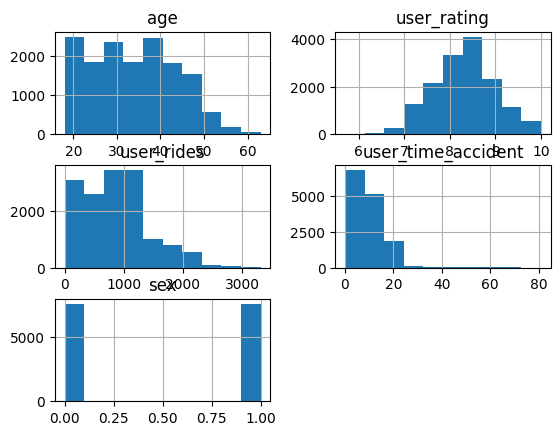

In [3]:
# Загружаем уже знакомый нам датасет и вызываем функцию hist( ):
rider_info = pd.read_csv('../data/driver_info.csv')
rider_info.hist()
rider_info.sample(5)

Видно, что графики получились мелкие и текстовая информация накладывается друг на друга, также столбец пол определился как числовой, хотя является категориальным. Исправим это, добавив параметр <code>figsize</code> и отсеим ненужный столбец.

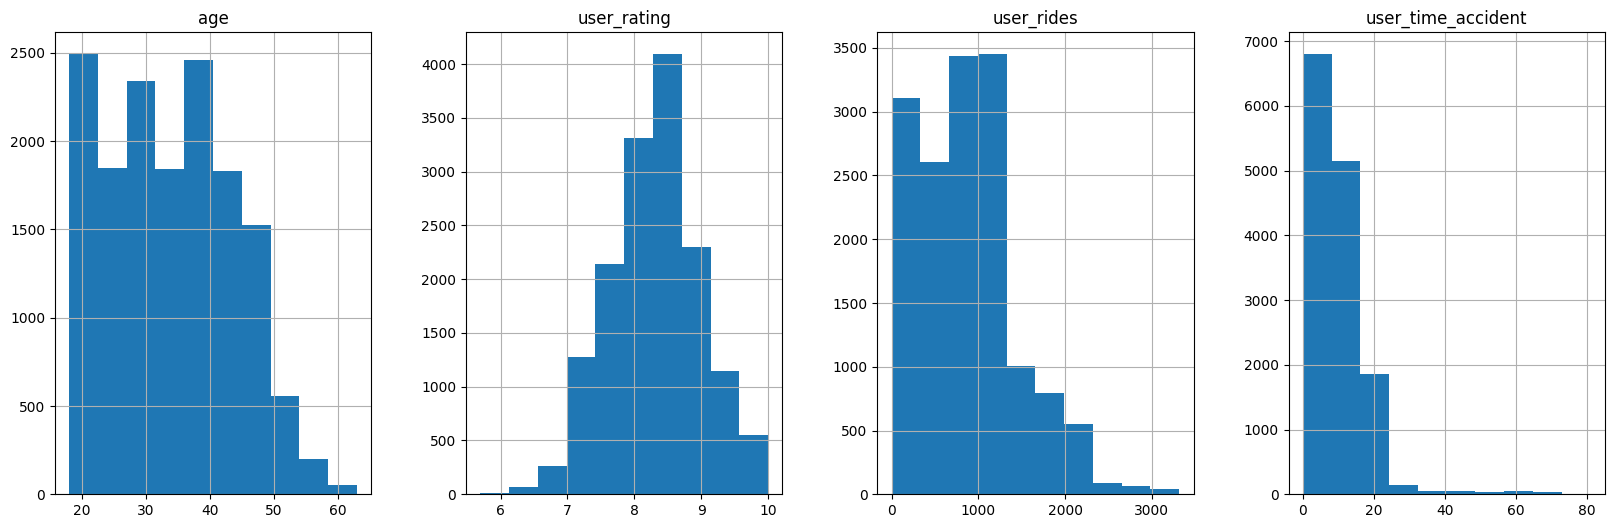

In [4]:
rider_info.drop('sex', axis=1).hist(figsize=(20, 6), layout = (1, 4));

# Добавили ; в конце, чтобы не выводилась служебная информация

<center><b> df.boxplot( )</b></center> 

<code>df.boxplot( )</code> - функция, позволяющая рисовать, так называемые, "ящики с усами", показывающие среднее значение, стандартные отклонения и разброс признака на одном графике. Давайте отобразим количество аварий, в зависимоти от пола водителя, также поменяем параметр <code>fontsize</code>, отвечающий за размер шрифта.

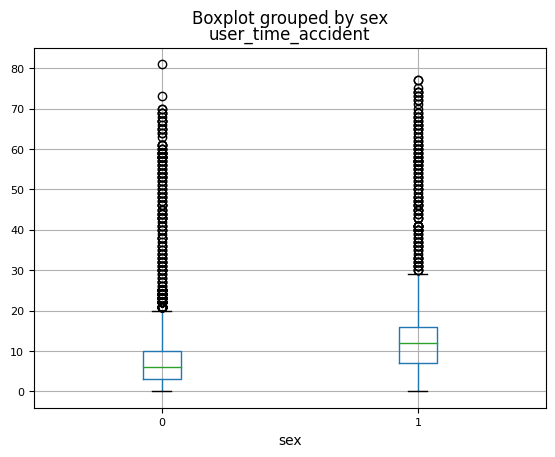

In [5]:
rider_info.boxplot(column=['user_time_accident'], by='sex', fontsize=8)
None

`df.plot( )` - функция предоставляющая весь функционал библиотеки Matplotlib, так же можно через точку указывать конкретный тип желаемого графика, например: `df.plot.bar( )` или `df.plot.scatter( )`. На наш взгляд, пользоваться ей не очень удобно, поэтому не будем на ней останавливаться, подробнее можно ознакомиться в документации. Сразу перейдем к более продвинутым инструментам!

# <center> seaborn - это все что вам надо!</center> 

---------------------------
* ✅ sns.lineplot()
* ✅ sns.scatterplot()
* ❌ sns.relplot() = sns.lineplot() + sns.scatterplot() + стероиды
---------------------------
* ✅ sns.pairplot()
* ✅ sns.heatmap()
------------------------------
* ❌ sns.kdeplot()
* ❌ sns.ecdfplot()
* ❌ sns.histplot() 
* ✅ sns.displot() = sns.histplot()  + kdeplot() + ecdfplot()+ стероиды
-----------------------------
* ❌ sns.boxplot()
* ✅ sns.catplot() = sns.boxplot() + стероиды
----------------------------
* ✅ sns.jointplot()

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme()

In [7]:
rides_info = pd.read_csv('../data/rides_info.csv')#.drop(['car_rating'], axis=1)
car_info = pd.read_csv('../data/car_info.csv')[['car_id','target_1', 'target_2']]
rides_info = rides_info.merge(car_info, on = 'car_id', how = 'left')
rides_info.head()      

user_id      car_id ride_id   ride_date  rating  ride_duration  \
0  I13186944D  A-1068587k     o1A  2020-01-01    3.51          80238   
1  R97784496t  A-1068587k     F1X  2020-01-01    5.72         105756   
2  I13694599a  A-1068587k     f1j  2020-01-02    5.57              5   
3  T93834217S  A-1068587k     Q1u  2020-01-02    4.52             46   
4  J40497939H  A-1068587k     C1X  2020-01-03    7.12             39   

   ride_cost  speed_avg  speed_max  stop_times      distance  refueling  \
0    1043089         38  52.000000           3  3.128016e+06          0   
1    1480577         45  64.000000           0  4.864626e+06          0   
2         60         73  93.602158           0  4.176389e+02          0   
3        640         45  62.000000           0  2.122785e+03          0   
4        306         39  58.000000           1  1.261300e+03          0   

   user_ride_quality  deviation_normal  target_1      target_2  
0          -0.302421              -0.0       NaN  engine_check  
1          -0.499172              -0.0       NaN  engine_check  
2          -1.548536              -5.0       NaN  engine_check  
3          -1.010666              -0.0       NaN  engine_check  
4          -0.940802              -0.0       NaN  engine_check

<center><b> sns.lineplot()</b></center> 

<code>lineplot</code> строит обычный линейный график

In [8]:
tmp = rides_info[rides_info['car_id'].isin(rides_info.sample(1000).car_id.unique()[:10])]

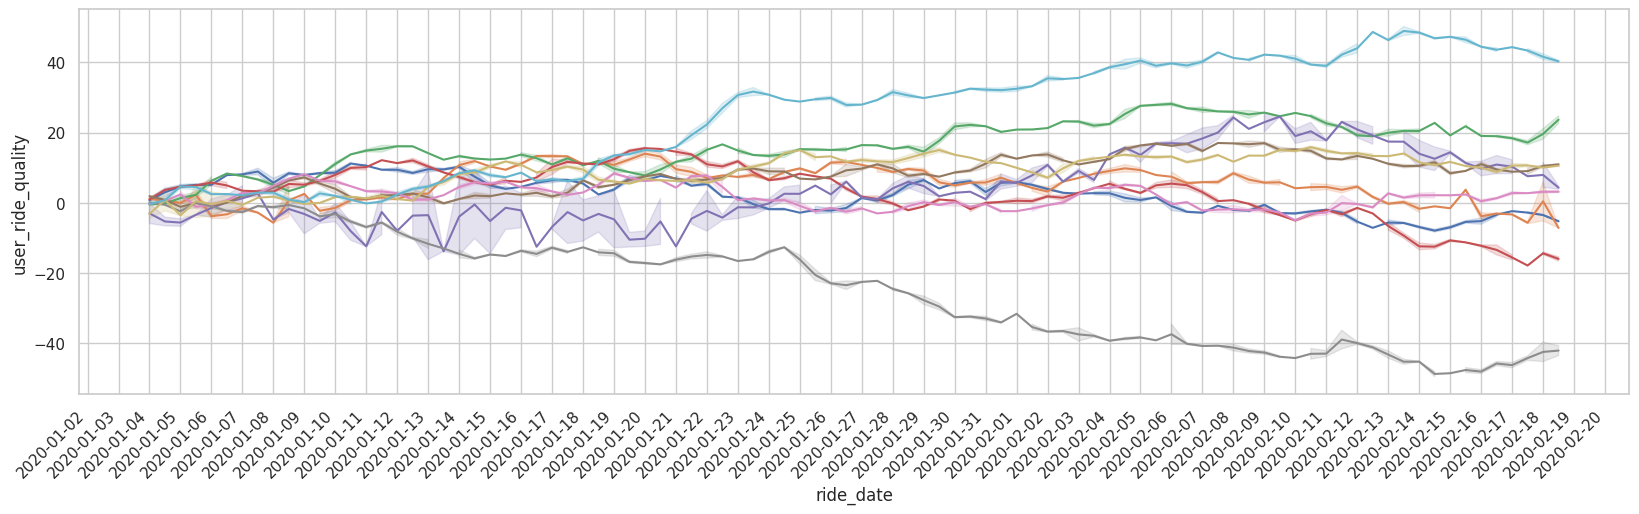

In [30]:
# Как растет качество поездки со временем на 10 автомобилях
plt.figure(figsize=(20, 5))
g = sns.lineplot(data = tmp,
                 x = 'ride_date',
                 y = 'user_ride_quality',
                 hue='car_id',
                 legend=False
                )
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.xaxis.set_major_locator(ticker.MultipleLocator(2))

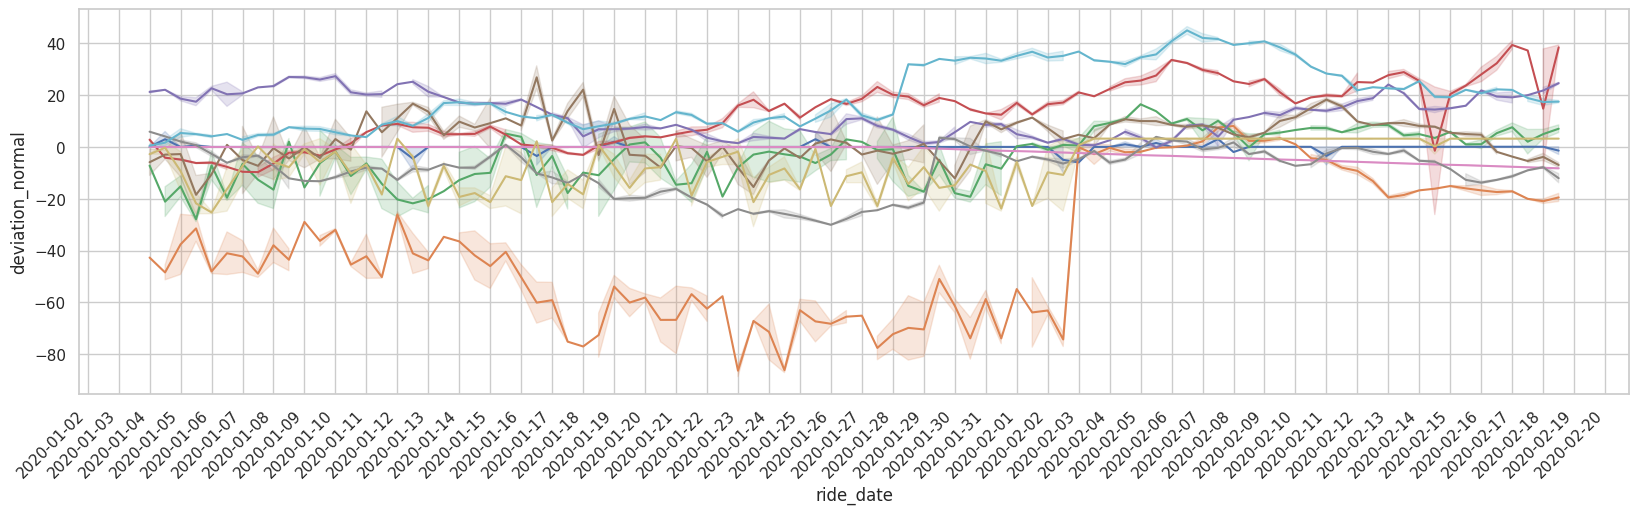

In [29]:
plt.figure(figsize=(20, 5))
tmp = rides_info[rides_info['car_id'].isin(rides_info.sample(100).car_id.unique()[:10])]
g = sns.lineplot(data = tmp, x = 'ride_date', y = 'deviation_normal', hue='car_id', legend=False); 

g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');
g.xaxis.set_major_locator(ticker.MultipleLocator(2))

##### Какие признаки могут помот различить классы поломок?
* Замечаем точки перегиба
* Замечаем точки входа
* Возможно углы наклона до перегиба
* Другие признаки


## <center>Диаграмма рассеяния</center>
<center><b> sns.scatterplot()</b></center> 
<center><b> Какого `hue='? )</b></center> 

Диаграмма рассеяния — это диаграмма, которая отображает точки на основе двух измерений набора данных.

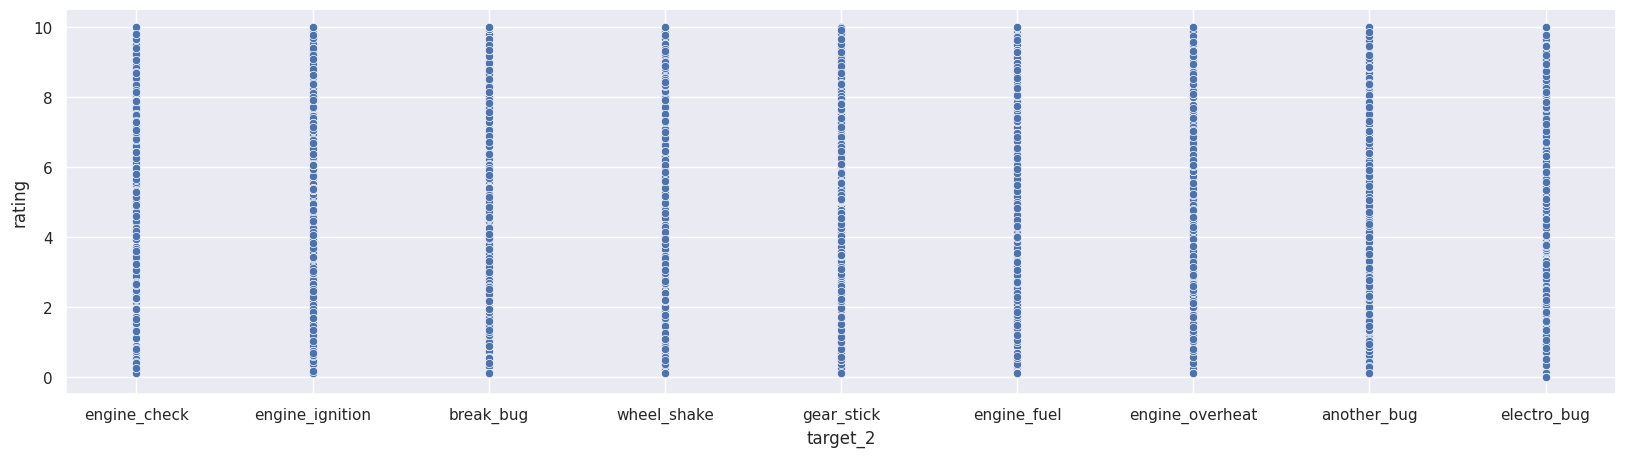

In [13]:
plt.figure(figsize=(20, 5))
sc = sns.scatterplot(data=rides_info, x="target_2", y="rating")

Чтобы было видно названия значений по оси X, повернем их на 45 градусов. <br>
Так же в параметр `hue` передадим название столбца для отображения распределения цветом. 

In [14]:
# Добавим пол водителя из таблицы rider_info и посмотрим как распределяется тип поломки в зависимости от пола
rider_info = pd.read_csv('../data/driver_info.csv')[['user_id', 'sex']]
tmp = rides_info.merge(rider_info, on = 'user_id', how = 'left')
# Передадим пол в параметр hue

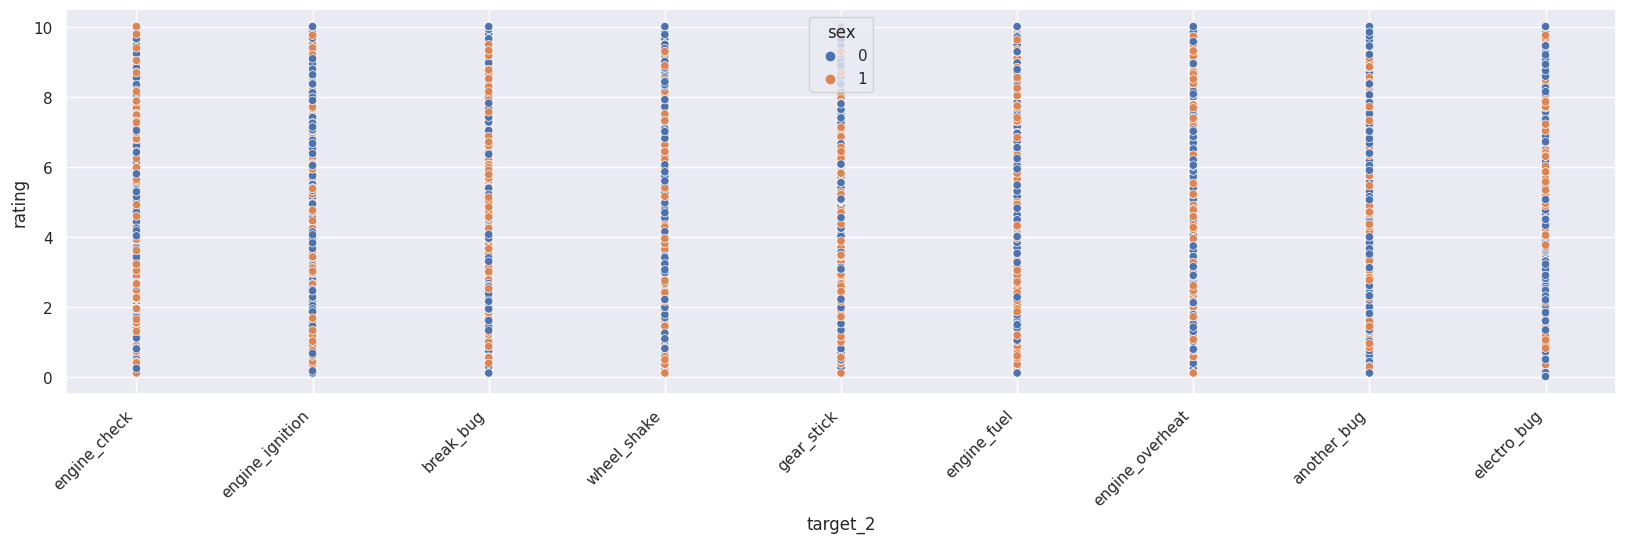

In [15]:
plt.figure(figsize=(20, 5))

sc = sns.scatterplot(data=tmp, x="target_2", y="rating", hue='sex')
sc.set_xticklabels(sc.get_xticklabels(),
                   rotation=45,
                   
                   horizontalalignment='right');

## <center> sns.relplot() = sns.scatterplot() + sns.lineplot() + стероиды</center> 

Функция `relplot()` объединяет в себе функционал `scatterplot()` и `lineplot()`, переключение происходит переключателем `kind`. <br>
Таким образом можно держать в голове меньше разных названий функций и параметров.

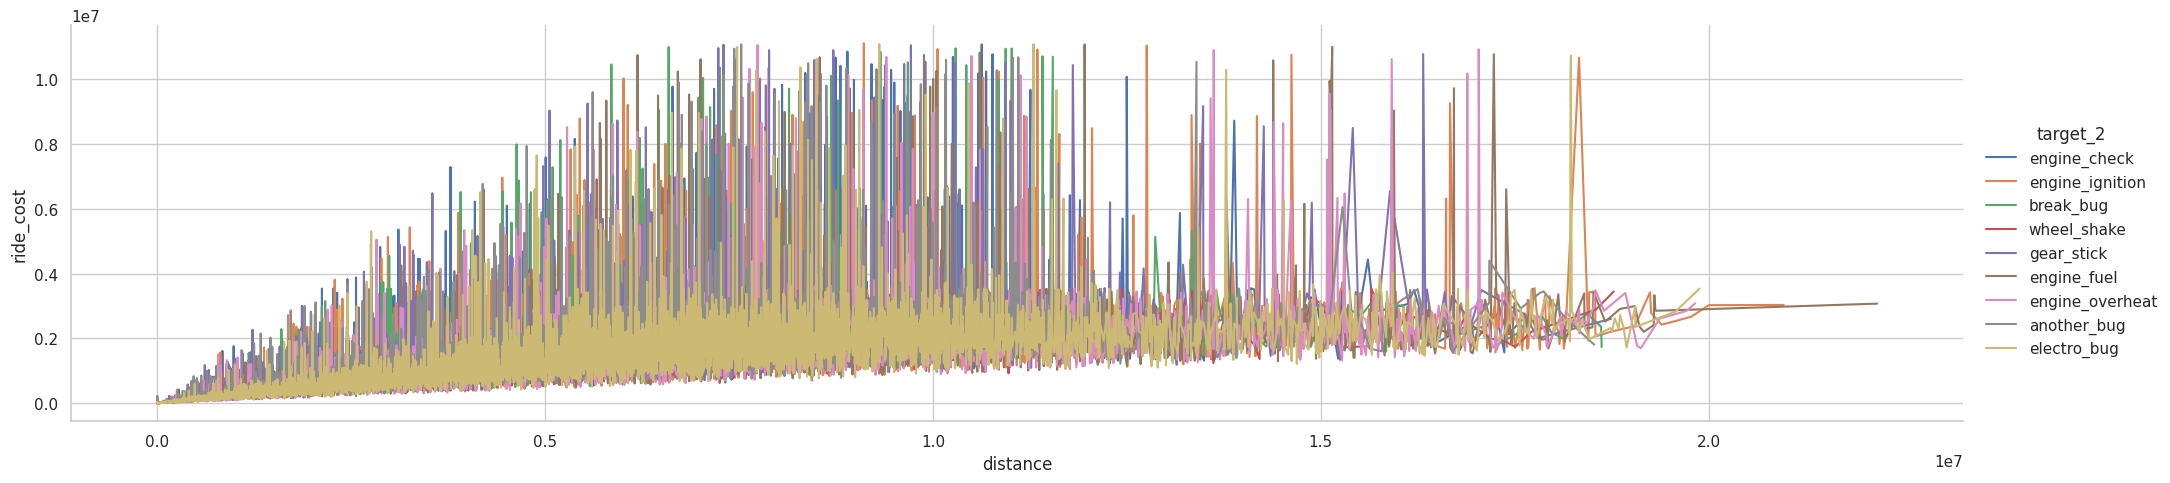

In [32]:
sns.relplot(data=rides_info,
            kind='line',
            x='distance',
            y='ride_cost',
            aspect = 4, 
            hue='target_2')

In [35]:
rides_info.head(2)

user_id      car_id ride_id   ride_date  rating  ride_duration  \
0  I13186944D  A-1068587k     o1A  2020-01-01    3.51          80238   
1  R97784496t  A-1068587k     F1X  2020-01-01    5.72         105756   

   ride_cost  speed_avg  speed_max  stop_times      distance  refueling  \
0    1043089         38       52.0           3  3.128016e+06          0   
1    1480577         45       64.0           0  4.864626e+06          0   

   user_ride_quality  deviation_normal  target_1      target_2  
0          -0.302421              -0.0       NaN  engine_check  
1          -0.499172              -0.0       NaN  engine_check

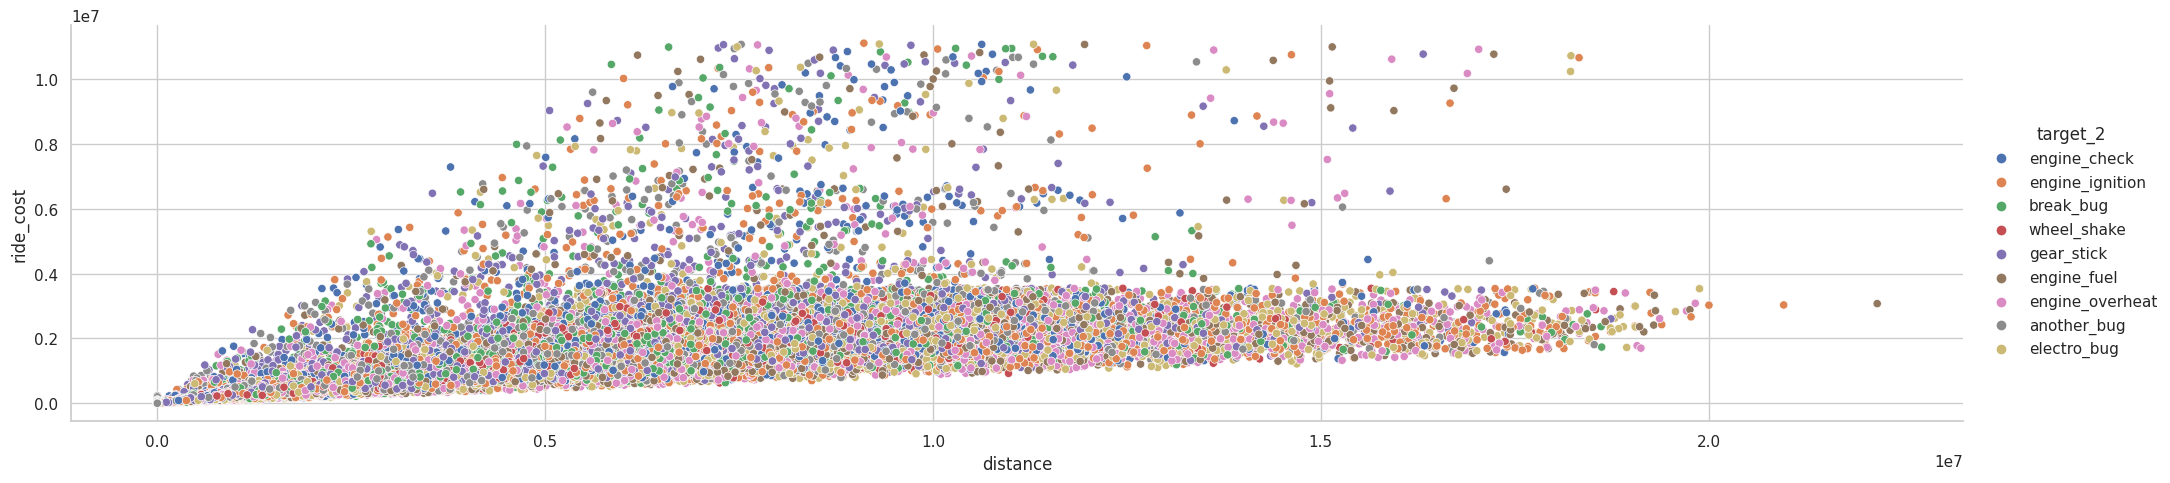

In [37]:
sns.relplot(data=rides_info,
            kind='scatter',
            x='distance',
            y='ride_cost',
            aspect = 4,
            legend = 'brief',
            hue='target_2');

## <center>Построение распределений</center>
<center><b> sns.displot()</b></center>
<center><b>Переключатель <code>kind</code></b></center> 

 В Seaborn одна и таже функция  может применяться для построения разных графиков, но тип графика можно переключать в параметре `kind`

<Figure size 2000x500 with 0 Axes>

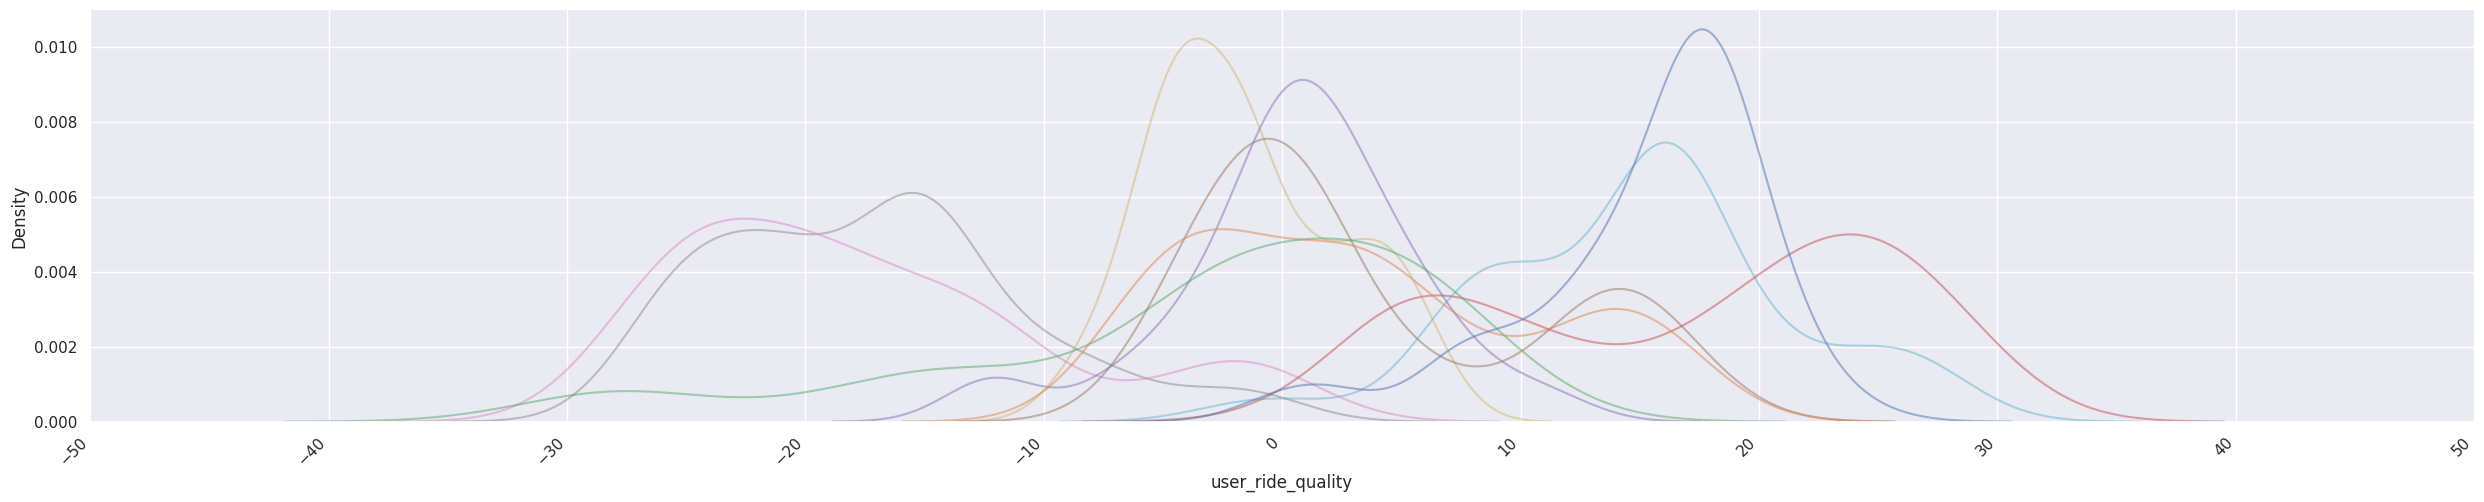

In [17]:
plt.figure(figsize=(20, 5))

tmp = rides_info[rides_info['car_id'].isin(rides_info.sample(100).car_id.unique()[:10])]
g = sns.displot(data = tmp, x= 'user_ride_quality', hue='car_id', legend=False, aspect = 5, kind = 'kde', alpha=0.5)
g.set_xticklabels(rotation=45, horizontalalignment='right');

<Figure size 2000x500 with 0 Axes>

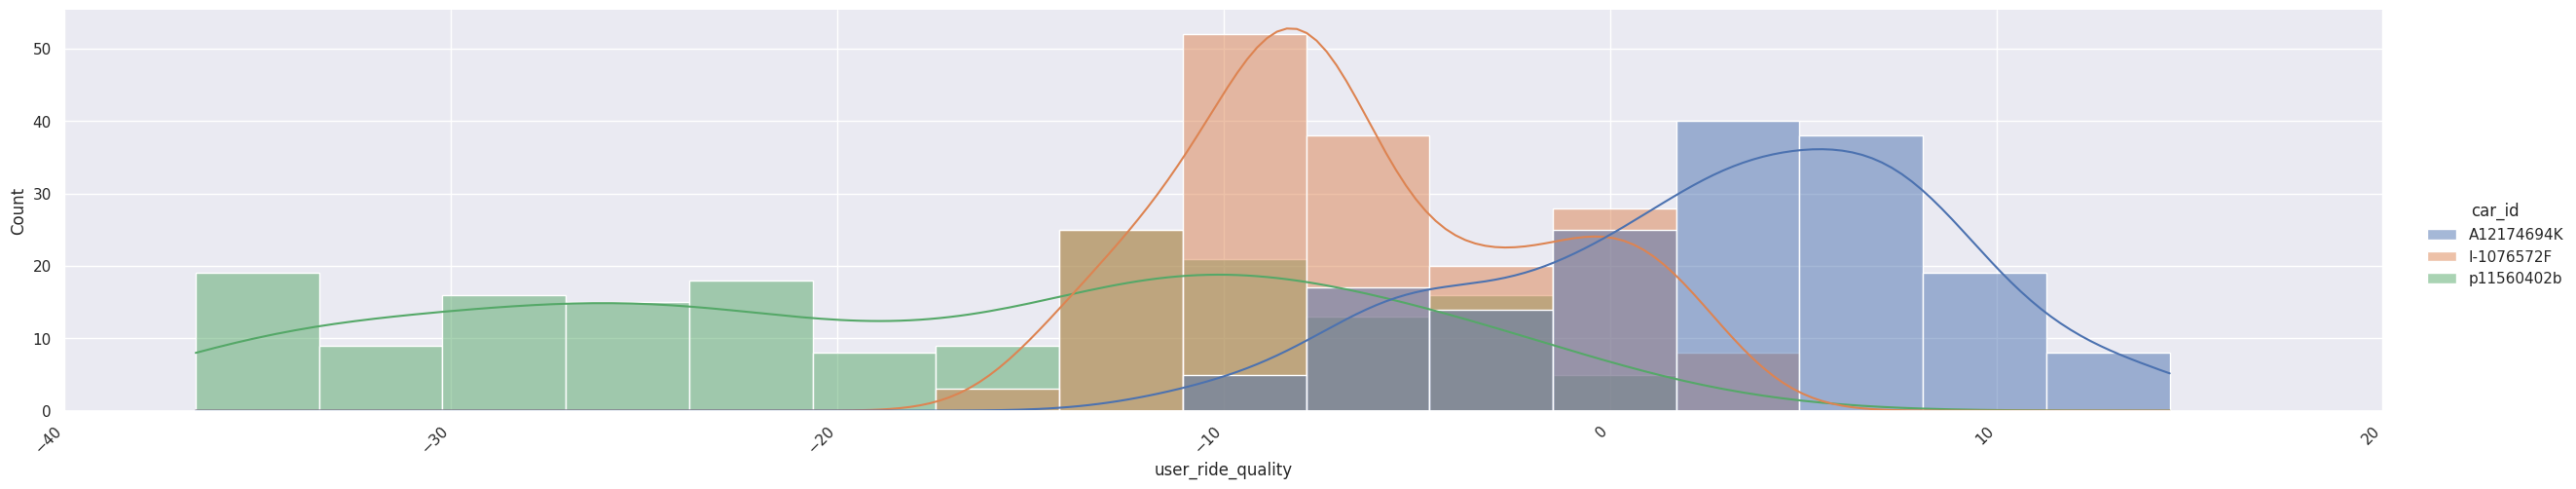

In [18]:
# Поменяем kind на hist и построим гистограмму
plt.figure(figsize=(20, 5))

tmp = rides_info[rides_info['car_id'].isin(rides_info.sample(100).car_id.unique()[:3])]
g = sns.displot(data = tmp, x= 'user_ride_quality', legend=True, aspect = 5, kind = 'hist', alpha=0.5, kde=True, hue='car_id')
g.set_xticklabels(rotation=45, horizontalalignment='right');

In [19]:
plt.figure(figsize=(25, 20))
tmp = rides_info[rides_info['car_id'].isin(rides_info.sample(100).car_id.unique()[:3])]

<Figure size 2500x2000 with 0 Axes>

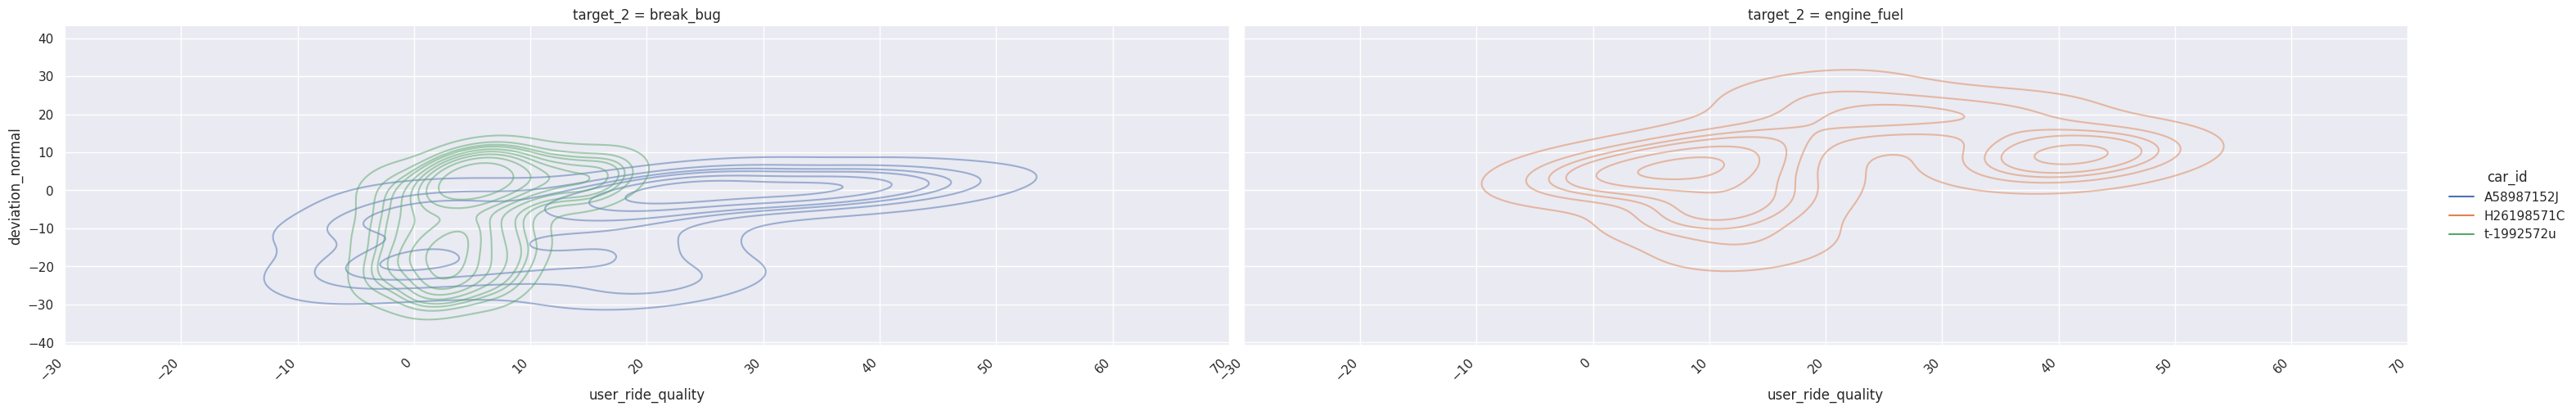

In [20]:
g = sns.displot(data = tmp, x= 'user_ride_quality',
                y='deviation_normal', legend=True,
                aspect = 3, kind = 'kde',
                alpha=0.5,
                hue='car_id',
                col='target_2'
               ).set_xticklabels(rotation=45, horizontalalignment='right');

## <center>Категориальные данные</center>
<center><b> sns.catplot()</b></center> 

In [21]:
# Добавим категориальный признак тип машины из car_info
car_info = pd.read_csv('../data/car_info.csv')[['car_id','car_type']]
temp_info = rides_info.merge(car_info, on = 'car_id', how = 'left')

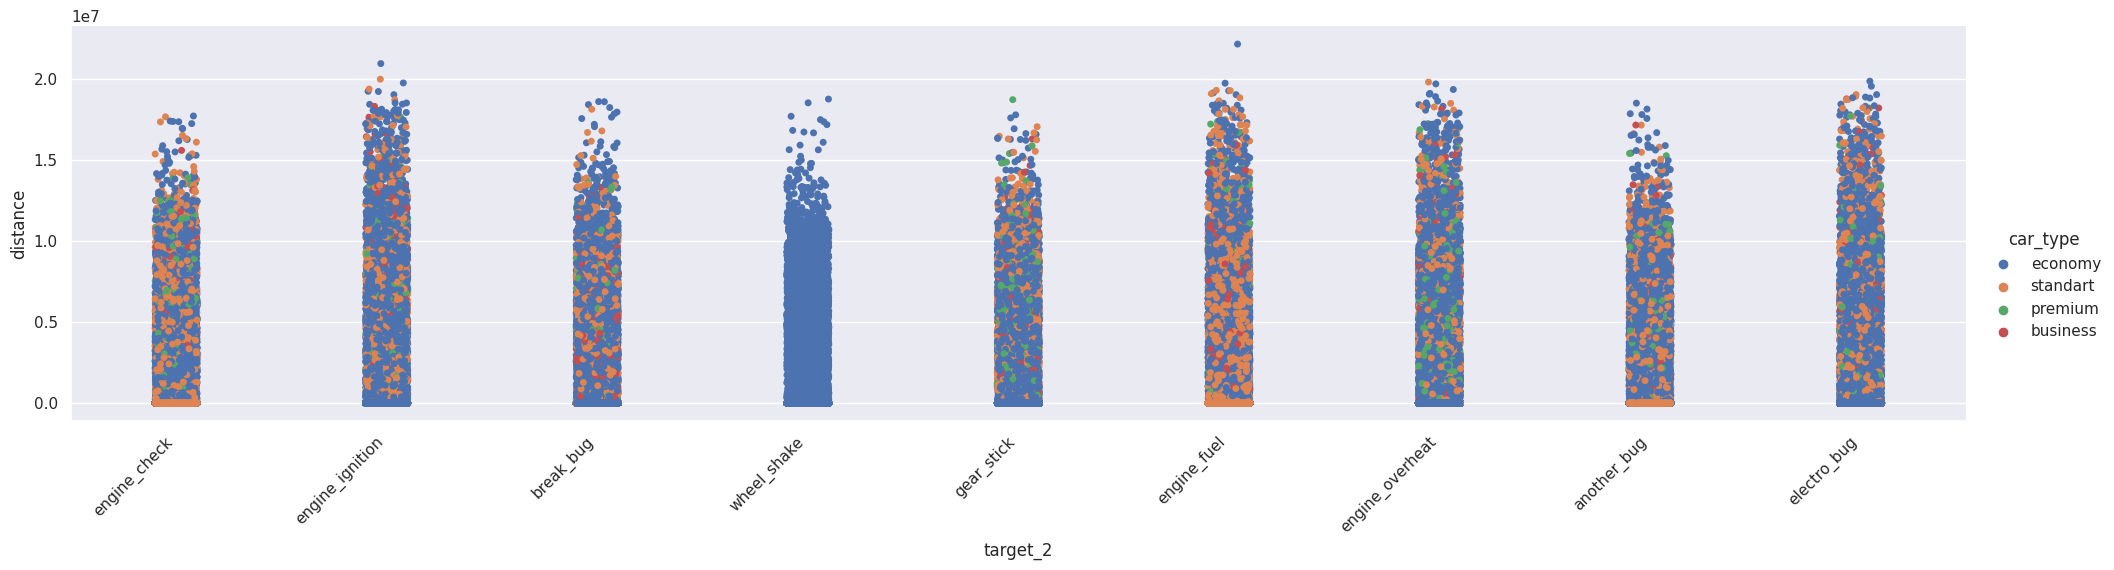

In [22]:
sns.catplot(data=temp_info,
            x='target_2',
            y='distance',
            aspect = 4,
            hue='car_type').set_xticklabels(rotation=45, horizontalalignment='right')

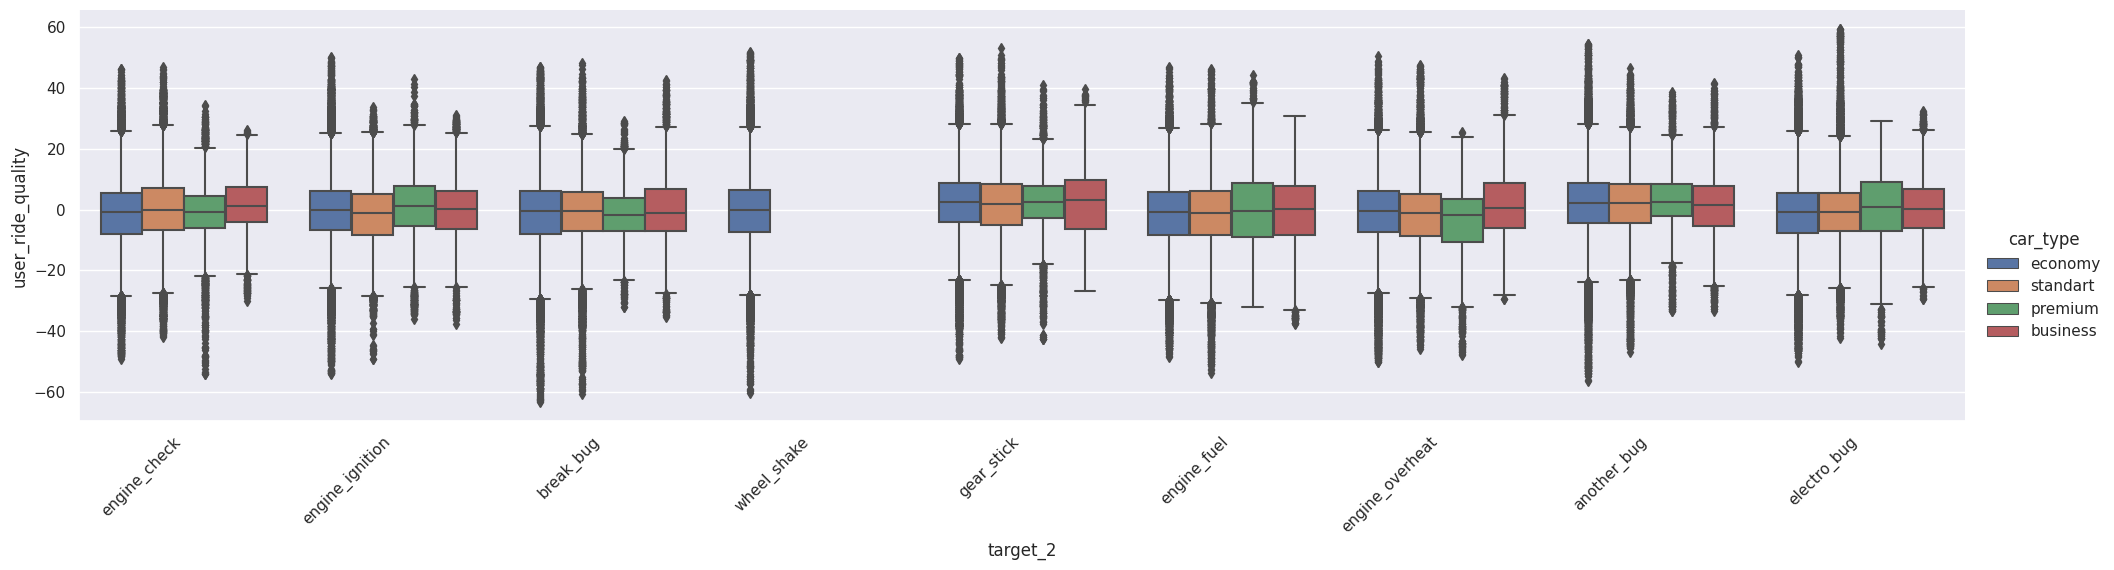

In [23]:
# Передадими в параметр kind=box, получим ящики с усами
sns.catplot(data=temp_info, 
            x='target_2',
            y='user_ride_quality',
            hue='car_type',
            aspect = 4,
            kind='box').set_xticklabels(rotation=45, horizontalalignment='right')

In [90]:
temp_info

user_id      car_id ride_id   ride_date  rating  ride_duration  \
0       I13186944D  A-1068587k     o1A  2020-01-01    3.51          80238   
1       R97784496t  A-1068587k     F1X  2020-01-01    5.72         105756   
2       I13694599a  A-1068587k     f1j  2020-01-02    5.57              5   
3       T93834217S  A-1068587k     Q1u  2020-01-02    4.52             46   
4       J40497939H  A-1068587k     C1X  2020-01-03    7.12             39   
...            ...         ...     ...         ...     ...            ...   
739495  O18712245E  z96586459k     W1D  2020-03-30    2.76            139   
739496  T20625051e  z96586459k     u1R  2020-03-31    5.05             33   
739497  S72456723t  z96586459k     I1x  2020-03-31    3.50             23   
739498  E15440781b  z96586459k     q1A  2020-04-01    5.89            152   
739499  n16142835J  z96586459k     n1K  2020-04-01    0.94             30   

        ride_cost  speed_avg   speed_max  stop_times      distance  refueling  \
0         1043089         38   52.000000           3  3.128016e+06          0   
1         1480577         45   64.000000           0  4.864626e+06          0   
2              60         73   93.602158           0  4.176389e+02          0   
3             640         45   62.000000           0  2.122785e+03          0   
4             306         39   58.000000           1  1.261300e+03          0   
...           ...        ...         ...         ...           ...        ...   
739495       1246         48  109.000000          10  2.153058e+03          0   
739496        456         32   58.000000           2  8.937668e+02          0   
739497        250         49   79.531720           0  1.005222e+03          0   
739498       1971         58  111.000000          12  2.208062e+03          0   
739499        325         32   47.000000           2  8.110969e+02          0   

        user_ride_quality  deviation_normal      target_1      target_2  \
0               -0.302421            -0.000           NaN  engine_check   
1               -0.499172            -0.000           NaN  engine_check   
2               -1.548536            -5.000           NaN  engine_check   
3               -1.010666            -0.000           NaN  engine_check   
4               -0.940802            -0.000           NaN  engine_check   
...                   ...               ...           ...           ...   
739495           2.639416            11.320  1.415471e+06   another_bug   
739496           0.669097            12.179  1.415471e+06   another_bug   
739497          -0.643290            21.914  1.415471e+06   another_bug   
739498          -0.892063            10.705  1.415471e+06   another_bug   
739499          -0.779080            -8.663  1.415471e+06   another_bug   

        car_type  
0        economy  
1        economy  
2        economy  
3        economy  
4        economy  
...          ...  
739495  standart  
739496  standart  
739497  standart  
739498  standart  
739499  standart  

[739500 rows x 17 columns]

## <center>Попарные корреляции. Тепловая карта</center>
<center><b> sns.heatmap()</b></center> 

Функция `heatmap( )`  чаще всего используется для отрисовки наглядной матрицы корреляций признаков. Посмотрим как её построить на нашем датасете.

Сначала посмотрим матрицу корреляций, котрорую выводит pandas:

In [24]:
rides_info.corr()

rating  ride_duration  ride_cost  speed_avg  speed_max  \
rating             1.000000       0.001680   0.001484  -0.082391  -0.279872   
ride_duration      0.001680       1.000000   0.907591   0.002403   0.001835   
ride_cost          0.001484       0.907591   1.000000   0.002616   0.001272   
speed_avg         -0.082391       0.002403   0.002616   1.000000   0.616791   
speed_max         -0.279872       0.001835   0.001272   0.616791   1.000000   
stop_times        -0.054863       0.000689  -0.001343  -0.130280   0.027472   
distance          -0.003531       0.964629   0.875845   0.067556   0.041877   
refueling          0.000296      -0.000510  -0.000463   0.000519   0.000601   
user_ride_quality  0.004246       0.000150   0.000763  -0.012726  -0.015377   
deviation_normal  -0.041939       0.001398   0.000219   0.036523   0.067104   
target_1          -0.034127      -0.005076   0.004875   0.027662   0.032354   

                   stop_times  distance  refueling  user_ride_quality  \
rating              -0.054863 -0.003531   0.000296           0.004246   
ride_duration        0.000689  0.964629  -0.000510           0.000150   
ride_cost           -0.001343  0.875845  -0.000463           0.000763   
speed_avg           -0.130280  0.067556   0.000519          -0.012726   
speed_max            0.027472  0.041877   0.000601          -0.015377   
stop_times           1.000000 -0.009178   0.005109           0.023067   
distance            -0.009178  1.000000  -0.000491          -0.000693   
refueling            0.005109 -0.000491   1.000000           0.000409   
user_ride_quality    0.023067 -0.000693   0.000409           1.000000   
deviation_normal     0.005017  0.003282   0.001080          -0.017211   
target_1            -0.060535 -0.004014  -0.000297          -0.007862   

                   deviation_normal  target_1  
rating                    -0.041939 -0.034127  
ride_duration              0.001398 -0.005076  
ride_cost                  0.000219  0.004875  
speed_avg                  0.036523  0.027662  
speed_max                  0.067104  0.032354  
stop_times                 0.005017 -0.060535  
distance                   0.003282 -0.004014  
refueling                  0.001080 -0.000297  
user_ride_quality         -0.017211 -0.007862  
deviation_normal           1.000000  0.138194  
target_1                   0.138194  1.000000

Можно ориентироваться, но достаточно сложно при большом количестве признаков. <br>
Теперь отрисуем матрицу с помощью `heatmap( )`:

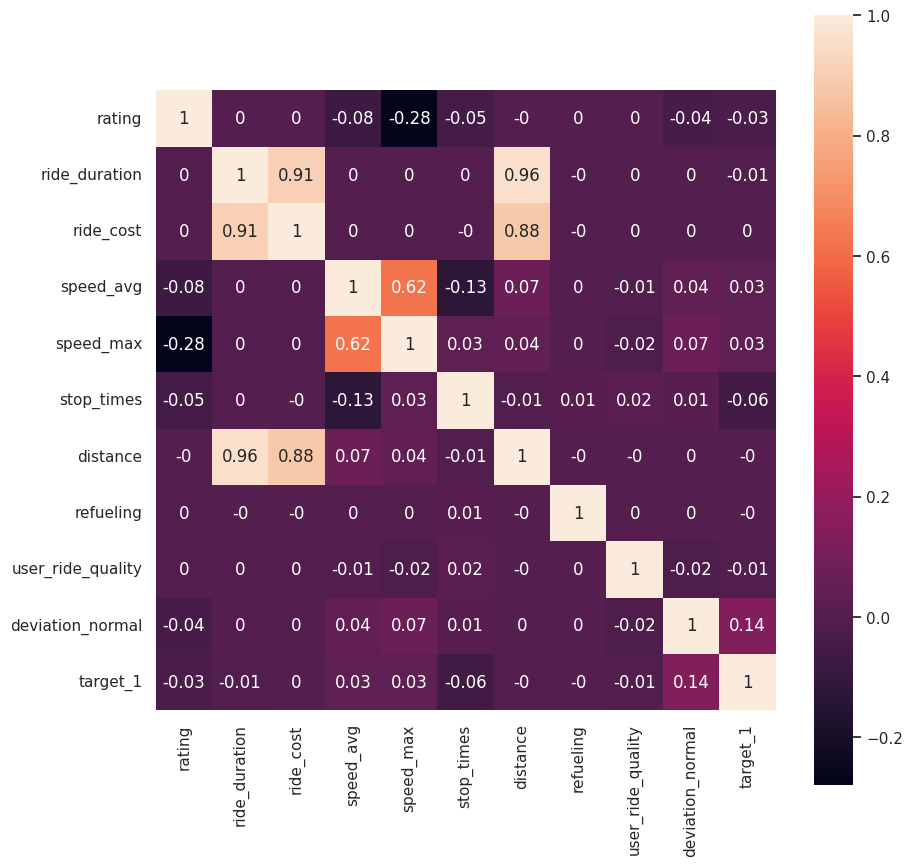

In [60]:
plt.rcParams['figure.figsize']= (10, 10)
sns.heatmap(rides_info.corr().round(2), square=True, annot=True);

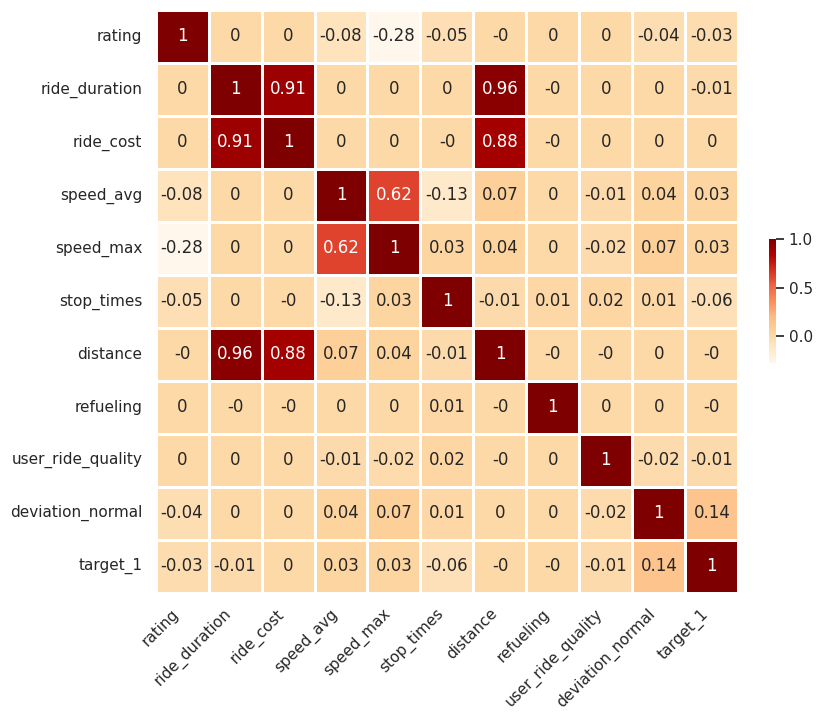

In [61]:
# Добавим красоты
colormap = sns.color_palette("Blues")
plt.rcParams['figure.figsize']=(8, 10)

g = sns.heatmap(rides_info.corr().round(2),
            annot=True,
            square = True,
            cmap='OrRd', # use orange/red colour map
            cbar_kws={'fraction' : 0.01}, # shrink colour bar
            linewidth=1, # space between cells
            ); 

g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

Видно, что части снизу и сверху от диагонали идентичны, и новой инфомации не несут, создавая визуальный шум - уберем одну из них

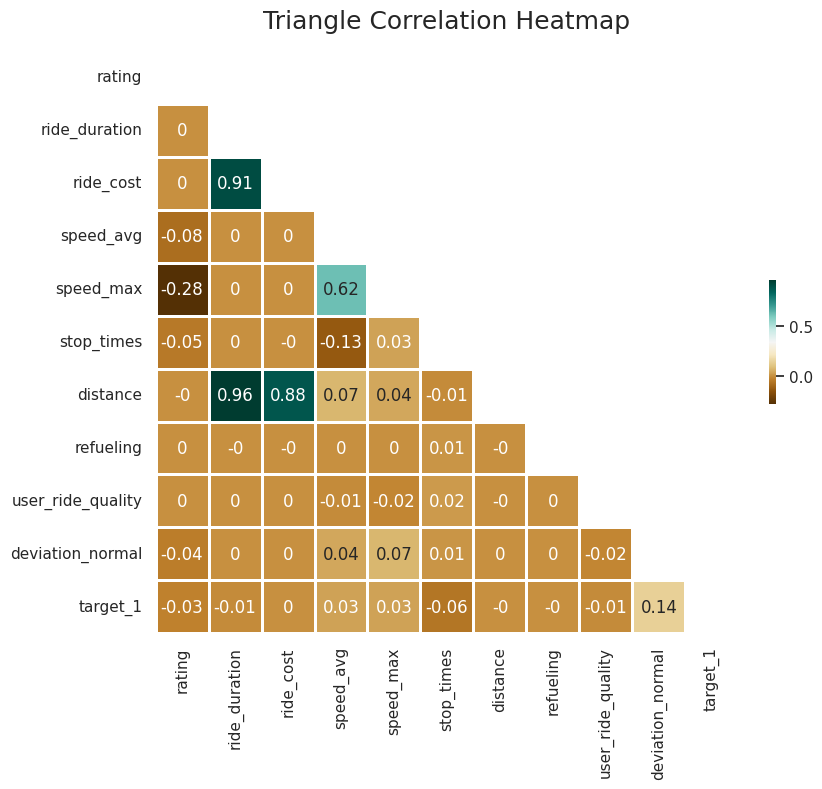

In [27]:
# Воспользуемся функциями np.triu, чтобы изолировать верхний треугольник (np.tril нижний)
# функция np.ones_like() изменит все изолированные значения на 1.
sns.set_style("whitegrid")
mask = np.triu(np.ones_like(rides_info.corr(), dtype=np.bool)) 

heatmap = sns.heatmap(rides_info.corr().round(2),
                      mask=mask, annot=True,
                      square = True,
                      cmap='BrBG',
                      cbar_kws={'fraction' : 0.01},
                      linewidth=1) 

heatmap.set_title('Триугольная тепловая карта корреляции', fontdict={'fontsize':18}, pad=16);

# Зависимость между переменными

# <center><b> sns.pairplot()</b></center> 

In [73]:
# sns.pairplot(rides_info)

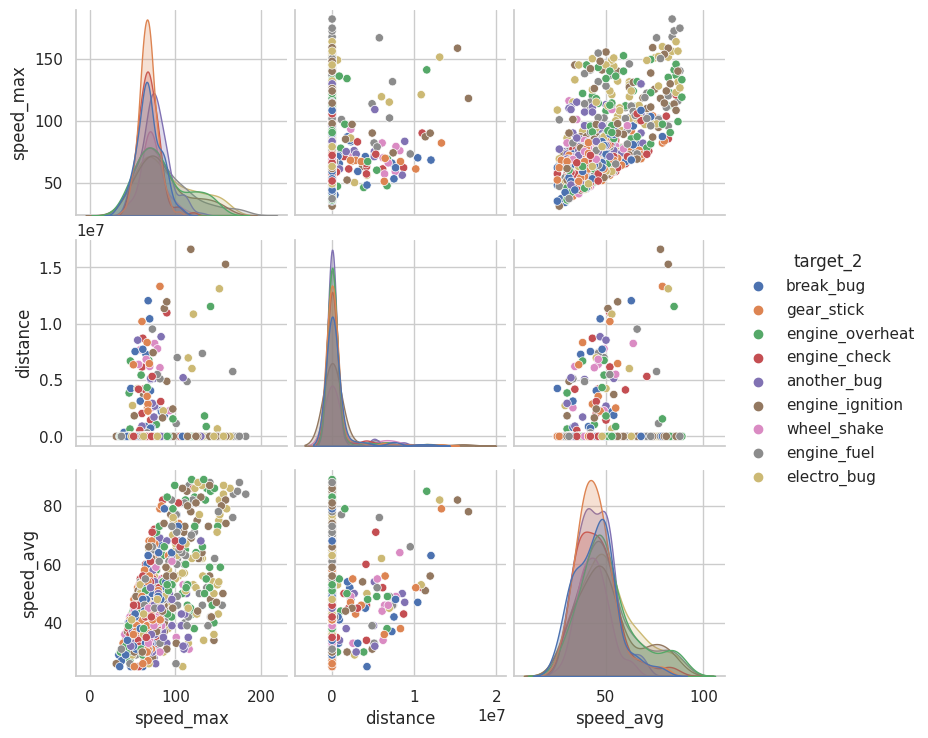

In [79]:
sns.pairplot(rides_info.sample(1000),
             vars = ['speed_max', 'distance', 'speed_avg'],
             hue='target_2');

## <center><b> Композиция нескольких видов графиков</b></center> 
<center><b> sns.jointplot()</b></center> 

In [ ]:
# Диаграмма рассеяния + распределения
sns.jointplot(x = "target_1", y = 'rating', data = rides_info, kind = 'reg')

In [ ]:
sns.jointplot(x = "target_1", y = 'rating', hue='target_2', data = rides_info, kind='scatter')

# FacetGrid

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

# Задачи

In [62]:
# Добавим категориальный признак тип машины из car_info
car_info = pd.read_csv('../data/car_info.csv')[['car_id','car_type']]
temp_info = rides_info.merge(car_info, on = 'car_id', how = 'left')
temp_info.head()

user_id      car_id ride_id   ride_date  rating  ride_duration  \
0  I13186944D  A-1068587k     o1A  2020-01-01    3.51          80238   
1  R97784496t  A-1068587k     F1X  2020-01-01    5.72         105756   
2  I13694599a  A-1068587k     f1j  2020-01-02    5.57              5   
3  T93834217S  A-1068587k     Q1u  2020-01-02    4.52             46   
4  J40497939H  A-1068587k     C1X  2020-01-03    7.12             39   

   ride_cost  speed_avg  speed_max  stop_times      distance  refueling  \
0    1043089         38  52.000000           3  3.128016e+06          0   
1    1480577         45  64.000000           0  4.864626e+06          0   
2         60         73  93.602158           0  4.176389e+02          0   
3        640         45  62.000000           0  2.122785e+03          0   
4        306         39  58.000000           1  1.261300e+03          0   

   user_ride_quality  deviation_normal  target_1      target_2 car_type  
0          -0.302421              -0.0       NaN  engine_check  economy  
1          -0.499172              -0.0       NaN  engine_check  economy  
2          -1.548536              -5.0       NaN  engine_check  economy  
3          -1.010666              -0.0       NaN  engine_check  economy  
4          -0.940802              -0.0       NaN  engine_check  economy

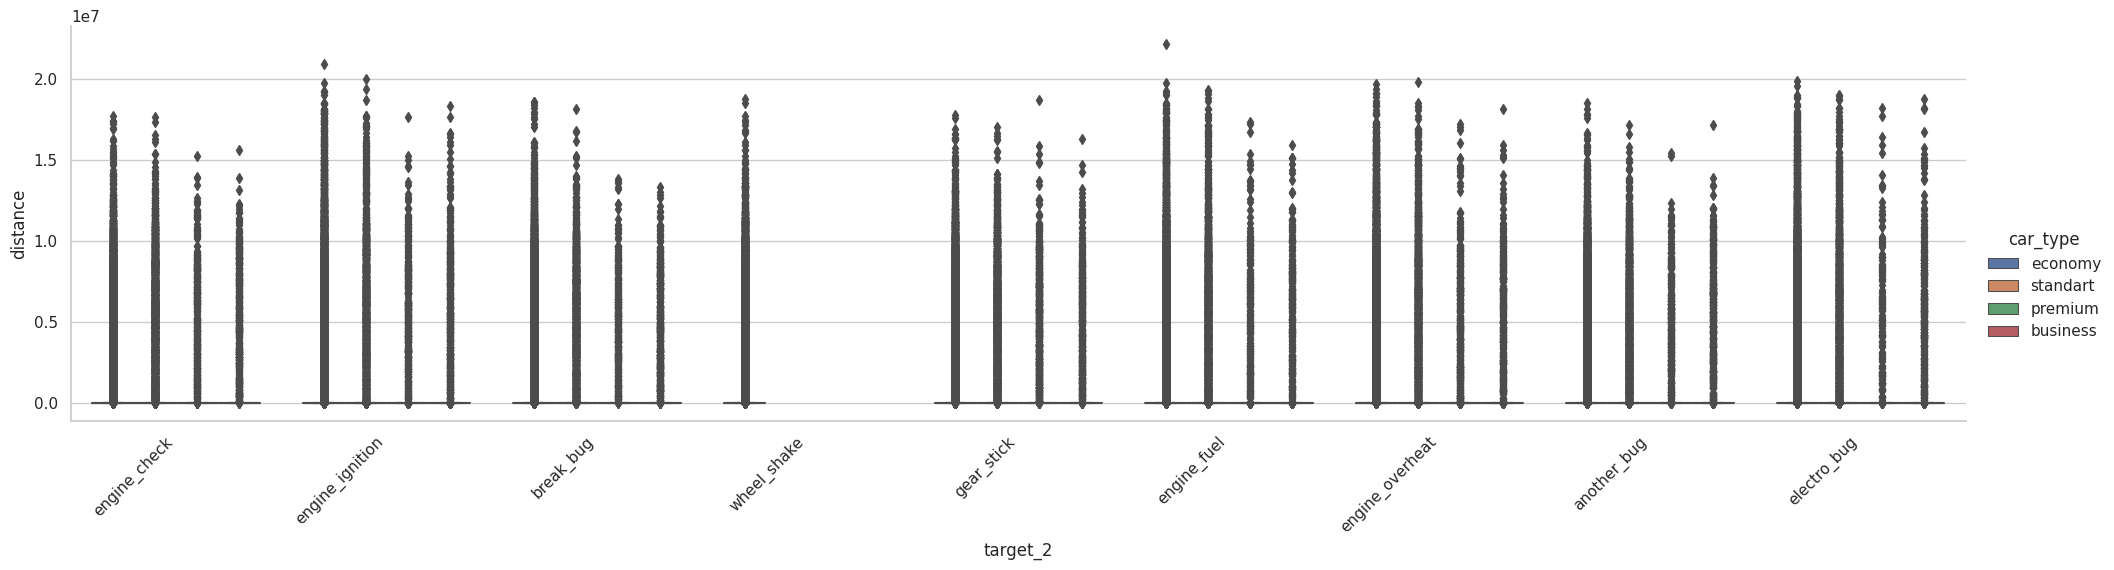

In [66]:
sns.catplot(data=temp_info,
            kind = 'box',
            x='target_2',
            y='distance',
            aspect = 4,
            hue='car_type').set_xticklabels(rotation=45, horizontalalignment='right');

In [75]:
sns.regplot(data=rides_info,
            # kind='scatter',
            x='distance',
            y='ride_cost',
            # aspect = 4,
            # legend = 'brief',
            # hue='target_2'
           );

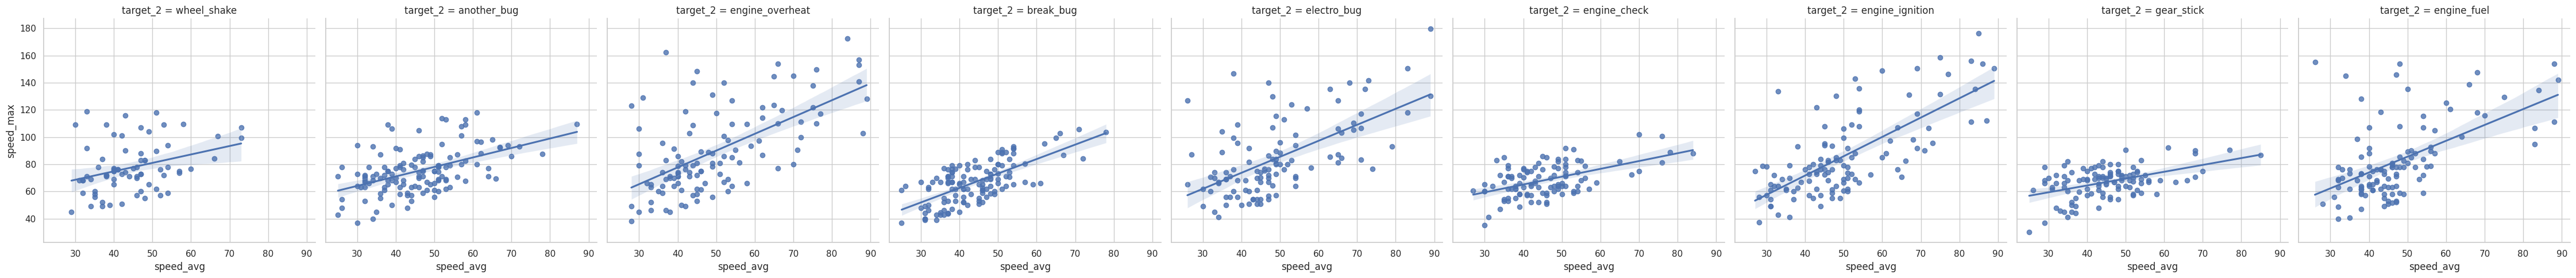

In [89]:
sns.lmplot(data=temp_info.sample(1000), x="speed_avg", y="speed_max", col="target_2");

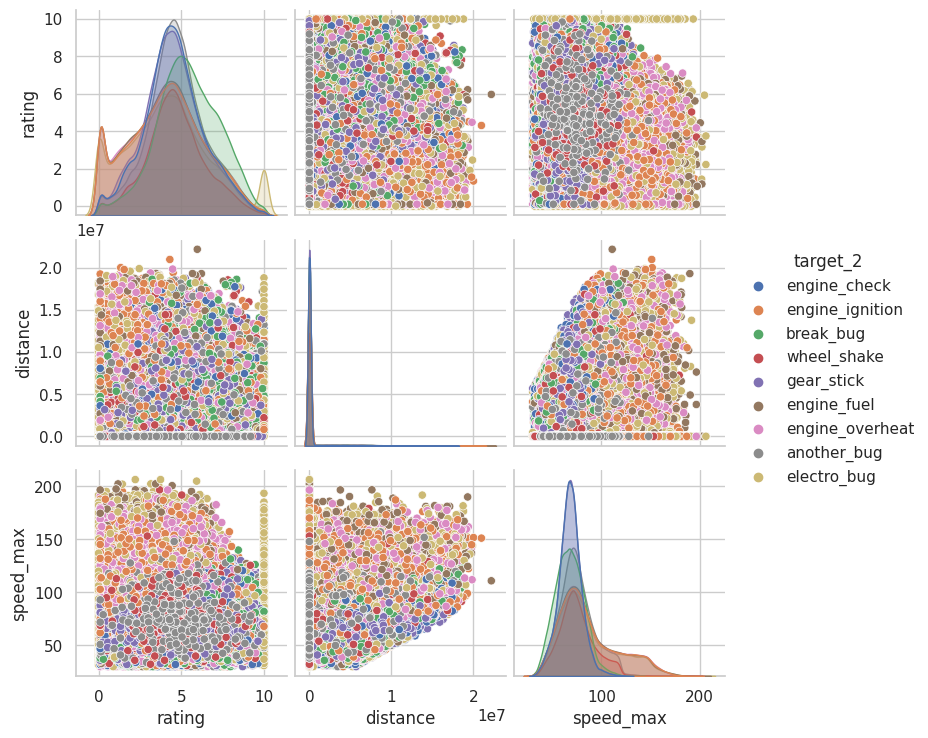

In [92]:
tmp = rides_info[['rating', 'distance', 'speed_max', 'target_2']]
sns.pairplot(tmp, hue='target_2')

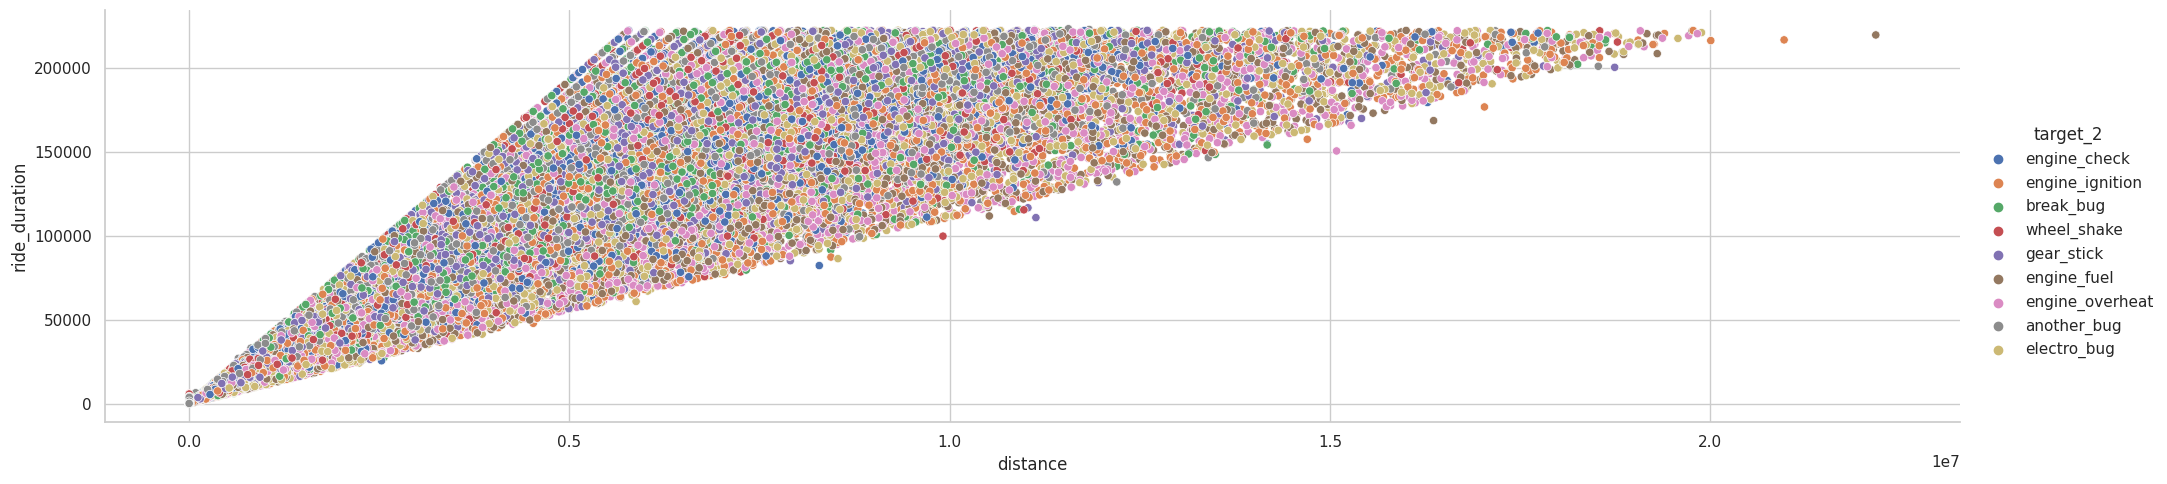

In [93]:
sns.relplot(data=rides_info,
            kind='scatter',
            x='distance',
            y='ride_duration',
            aspect = 4,
            legend = 'brief',
            hue='target_2');

In [ ]:
- 